In [1]:
import torch
from models.vae.asymmetrical_model import VAEEncoder, VAEDecoder, VAEModel

In [2]:
encoder = VAEEncoder(input_dim=3, hidden_dim=512, latent_dim=256, encoder_dim_before_fc=29)

in features: 430592


In [3]:
x = torch.randn(10, 3, 128, 128)

In [4]:
q_z = encoder(x)
q_z

Normal(loc: torch.Size([10, 256]), scale: torch.Size([10, 256]))

In [5]:
z = q_z.rsample()

In [6]:
decoder = VAEDecoder(encoder_input_dim=3, encoder_hidden_dim=512, encoder_latent_dim=256, encoder_dim_before_fc=29)

In [7]:
p_x = decoder(z)

In [8]:
p_x

Normal(loc: torch.Size([10, 3, 128, 128]), scale: torch.Size([10, 3, 128, 128]))

In [9]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


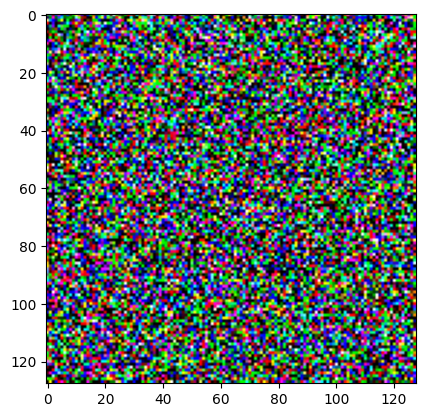

In [10]:
fig, ax = plt.subplots()

x_pred = p_x.sample()[0]

ax.imshow(x_pred.permute(1,2,0).cpu().numpy())